In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

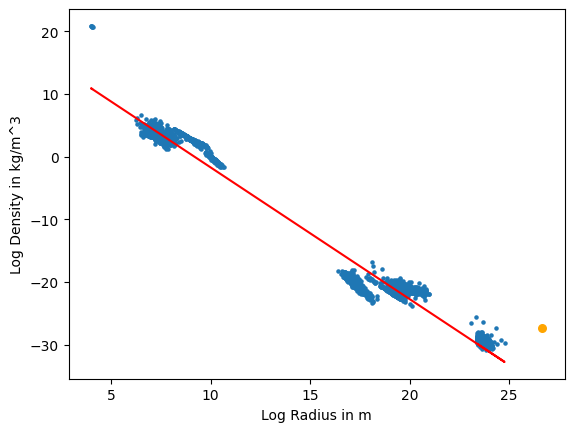

Linear Regression:
Linear Regression Statistics:
F-statistic: 418292.4068
P-value: 0.0000e+00
Degrees of Freedom (Model, Residual): (1.0, 6190.0)
Estimated Effect Size (Coefficient for 'radius'): -2.1027
 
-2.103 x + 19.34


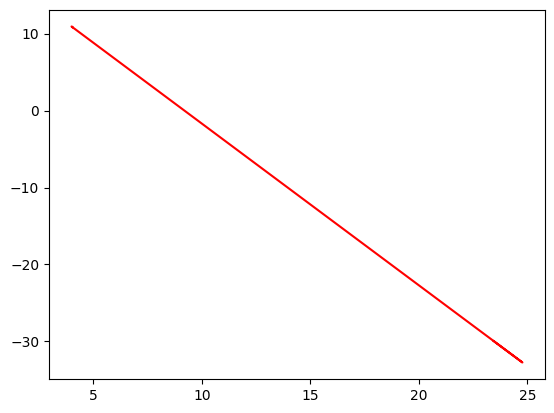

In [ ]:
df = pd.read_csv('../work/HSRA Research Sheets - Unified Databases.csv')

df.drop(df[df['PType'] == "WD"].index, inplace = True)


df['density']=(df['Mass(Kg)'])/((df['Radius(m)']**3)*(4/3)*math.pi)
df['density'] = np.log10(df['density'])
df['radius'] = np.log10(df['Radius(m)'])

plt.scatter(df['radius'], df['density'], s=5)
plt.xlabel('Log Radius in m')
plt.ylabel('Log Density in kg/m^3')

zLinear = np.polyfit(df['radius'], df['density'], 1)
zQuadratic = np.polyfit(df['radius'], df['density'], 2)
pLinear = np.poly1d(zLinear)
pQuadratic = np.poly1d(zQuadratic)
plt.plot(df['radius'], pLinear(df['radius']), color='r', label='Trend Line (Linear)')
plt.scatter([np.log10(4.44654332211e26)], [np.log10(4.0732e-28)], s = 30, color = "orange")
y_pred_linear = pLinear(df['radius'])
y_mean = np.mean(df['density'])
ss_total = np.sum((df['density'] - y_mean) ** 2)

plt.show()

X_linear = sm.add_constant(df['radius'])
model_linear = sm.OLS(df['density'], X_linear).fit()


plt.plot(df['radius'], model_linear.predict(), color='r', label='Trend Line (Linear)')



print("Linear Regression:")
f_statistic_linear = model_linear.fvalue
p_value_linear = model_linear.f_pvalue
degrees_of_freedom_linear = model_linear.df_model, model_linear.df_resid
effect_size_linear = model_linear.params['radius']

print("Linear Regression Statistics:")
print(f"F-statistic: {f_statistic_linear:.4f}")
print(f"P-value: {p_value_linear:.4e}")
print(f"Degrees of Freedom (Model, Residual): {degrees_of_freedom_linear}")
print(f"Estimated Effect Size (Coefficient for 'radius'): {effect_size_linear:.4f}")



print(pLinear)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fdc13804-8e9e-42b5-b07c-64788a4e4ff3' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>